# 🤖 Supervised and Unsupervised Learning in Machine Learning

Machine Learning is the science of making computers learn and act like humans by feeding data and information without being explicitly programmed.

Machine learning algorithms are trained with training data. When new data comes in, they can make predictions and decisions accurately based on past data. 

For example, whenever you ask Siri to do something, a powerful speech recognition converts the audio into its corresponding textual form. This is sent to the Apple servers for further processing where language processing algorithms are run to understand the user's intent. Then finally, Siri tells you the answer. 

There are **two types** of machine learning:

1. Supervised Learning
2. Unsupervised Learning

In [1]:
from IPython.display import Image

## What is Supervised Learning?

In Supervised Learning, the machine learns under supervision. It contains a model that is able to predict with the help of a labeled dataset. A labeled dataset is one where you already know the target answer. 

<img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/supervised-learning.png">

In this case, we have images that are labeled a spoon or a knife. This known data is fed to the machine, which analyzes and learns the association of these images based on its features such as shape, size, sharpness, etc. Now when a new image is fed to the machine without any label, the machine is able to predict accurately that it is a spoon with the help of the past data.

Supervised learning can be further divided into two types:

1. Classification
2. Regression

## What is Unsupervised Learning?
In Unsupervised Learning, the machine uses unlabeled data and learns on itself without any supervision. The machine tries to find a pattern in the unlabeled data and gives a response.

<img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/unsupervised-machine-learning.png">

Unsupervised learning can be further grouped into types:

1. Clustering
2. Association

## Difference Between Supervised and Unsupervised Learning

<table><tbody>
<tr>
<td>
<p><strong>Supervised Learning</strong></p>
</td>
<td>
<p><strong>Unsupervised Learning</strong></p>
</td>
</tr>
<tr>
<td>
<p>It uses known and labeled data as input</p>
</td>
<td>
<p>It uses unlabeled data as input</p>
</td>
</tr>
<tr>
<td>
<p>It has a feedback mechanism&nbsp;</p>
</td>
<td>
<p>It has no feedback mechanism</p>
</td>
</tr>
<tr>
<td>
<p>The most commonly used supervised learning algorithms are:</p>
<ul>
<li>Decision tree</li>
<li>Logistic regression</li>
<li>Support vector machine</li>
</ul>
</td>
<td>
<p>The most commonly used unsupervised learning algorithms are:&nbsp;</p>
<ul>
<li>K-means clustering</li>
<li>Hierarchical clustering</li>
<li>Apriori algorithm</li>
</ul>
</td>
</tr>
</tbody></table>

## Choosing the right estimator

Often the hardest part of solving a machine learning problem can be finding the right estimator for the job.

Different estimators are better suited for different types of data and different problems.


<img src="https://scikit-learn.org/stable/_static/ml_map.png" width=1200>

In machine learning, Classification is used to split data into categories. But after cleaning and preprocessing the data and training our model, how do we know if our classification model performs well? That is where a confusion matrix comes into the picture. 

A confusion matrix is used to measure the performance of a classifier in depth. In this simple guide to Confusion Matrix, we will get to understand and learn confusion matrices better.

# ✍🏻 MNIST dataset and performance measures

In this notebook, we would like to go through some of the ML algorithms. Precisely, we would like to evaluate and compare the following performance metrics :
- Confusion matrix
- Recall
- Precision
- FP Rate
- Specificity
- ROC curve

The measures will be taken on classification tasks on handwritten data.

The metrics will be implemented from scratch and will be compared to the metrics offered by the standard librairies *(scikit-learn)*.

🛑 KNN will be coded from scratch ! 



## Importing librairies

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.naive_bayes import GaussianNB,CategoricalNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
plt.style.use('seaborn')
from sklearn.svm import SVC
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [7]:
Data = pd.read_csv('Data/breast.csv')
Data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.013400,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.020580,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,14.87,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.04951,0.1487,0.05748,0.2323,1.6360,1.596,21.84,0.005415,0.01371,0.02153,0.011830,0
496,12.65,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.05074,0.1641,0.06854,0.2324,0.6332,1.696,18.40,0.005704,0.02502,0.02636,0.010320,0
497,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,0.06046,0.1532,0.7810,1.253,11.91,0.003796,0.01371,0.01346,0.007096,0
498,18.49,17.52,121.30,1068.0,0.10120,0.13170,0.14910,0.09183,0.1832,0.06697,0.7923,1.0450,4.851,95.77,0.007974,0.03214,0.04435,0.015730,1


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

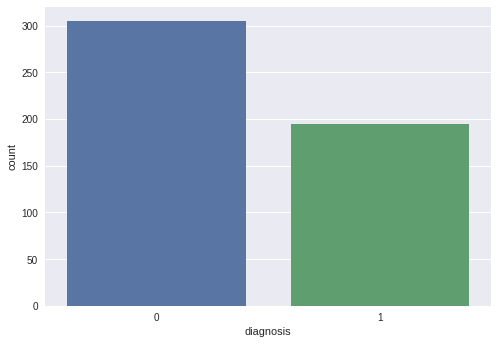

In [10]:
sns.countplot(x='diagnosis',data=Data)

In [11]:
X = Data.drop("diagnosis", axis = 1)
Y = Data['diagnosis']

## Normalisation

In [12]:
Newdata2 = X.copy()
for column in X.columns:
    if Newdata2[column].dtype == 'float64' or Newdata2[column].dtype =='int64':
        Newdata2[column] = (X[column] - X[column].mean()) / X[column].std()
        M=[]
l=Newdata2.shape[0]
for i in range(l):
    c=0
    for column in Newdata2.columns:
        if Newdata2[column].dtype == 'float64':
            c=c+1
            M.append(Newdata2[column].iloc[i])
newar=np.asarray(M)
newdat=newar.reshape(l,c)
X = pd.DataFrame(newdat,columns = [column for column in Newdata2.columns if Newdata2[column].dtype == 'float64'])


## Box-Plot

<AxesSubplot:>

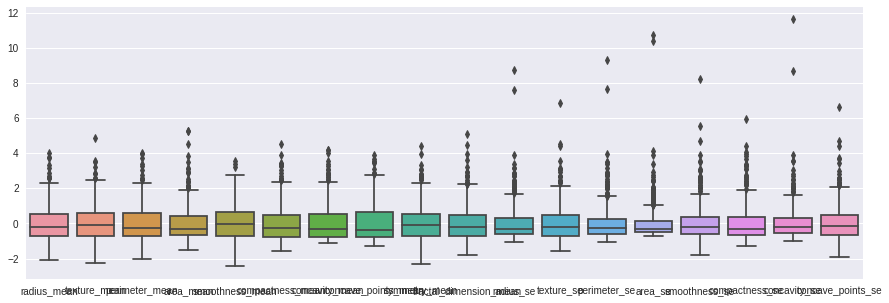

In [13]:
plt.figure(figsize=(15,5))
sns.boxplot(data=X)

## 📊📂The training set (data & labels)

### 📜 Data

In [14]:
x_train, x_test, y_train ,y_test = train_test_split(X,Y,test_size=0.2)

### 🔖 Labels

In machine learning, data labeling is the process of identifying raw data (images, text files, videos, etc.) and adding one or more meaningful and informative labels to provide context so that a machine learning model can learn from it.

In our case, we have a csv file comprising of labels (from 1 to 10).

<center><img src="https://learningactors.com/wp-content/uploads/2017/08/10.png" ></center>

Let's dive into our ``labels.csv`` file and see how our labels look like :

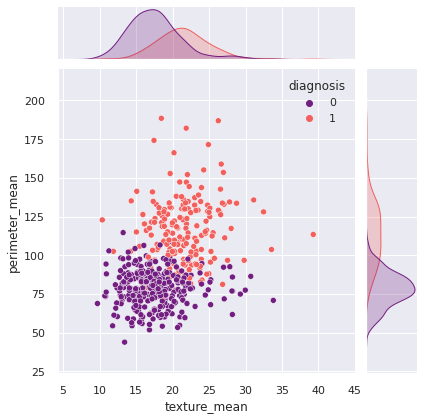

In [17]:
#plt.figure(figsize=(20,10))
sns.set_theme()
sns.jointplot(data=Data,x='texture_mean',y='perimeter_mean',hue='diagnosis',palette="magma")

By convention, **label 10** corresponds to **0**. This is used in order to facilitate heavy computations.

# 📉 Performance measures

In this part, we're going to define the general performance measures all along with **their implementation from scratch**.

<h3> What Are Confusion Matrices, and Why Do We Need Them? </h3>


Classification Models have multiple categorical outputs. Most error measures will calculate the total error in our model, but we cannot find individual instances of errors in our model. The model might misclassify some categories more than others, but we cannot see this using a standard accuracy measure.

Furthermore, suppose there is a significant class imbalance in the given data. In that case, i.e., a class has more instances of data than the other classes, a model might predict the majority class for all cases and have a high accuracy score; when it is not predicting the minority classes. This is where confusion matrices are useful.

A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes.

It plots a table of all the predicted and actual values of a classifier.

<center><img src="https://www.nbshare.io/static/snapshots/cm_colored_1-min.png" width=800></center>

<h4>False Positives (FP-Type 1 error) vs False Negatives (FN-Type 2 error)</h4>

<center><img src="https://www.nbshare.io/static/snapshots/Precisionrecall_2-min.png" width=400></center>

**a Type 1 error** is the rejection of the null hypothesis when it is actually true

**a Type 2 error** is the acceptance of the null hypothesis when it is actually false.  (Some statisticians prefer to say “failure to reject” rather than “accept” the null hypothesis for Type 2 errors.)


**A Type 1 error** is also known as a false positive, and **a Type 2 error** is also known as a false negative.  This nomenclature comes from the conventional connotation of

the null hypothesis as the “negative” or the “boring” result
the alternative hypothesis as the “positive” or “exciting” result.

### ⚫ Confusion Matrix

 In our case, we have 8 classes, so the matrix is 8*8.

 The matrix will look like this one :
 


<AxesSubplot:>

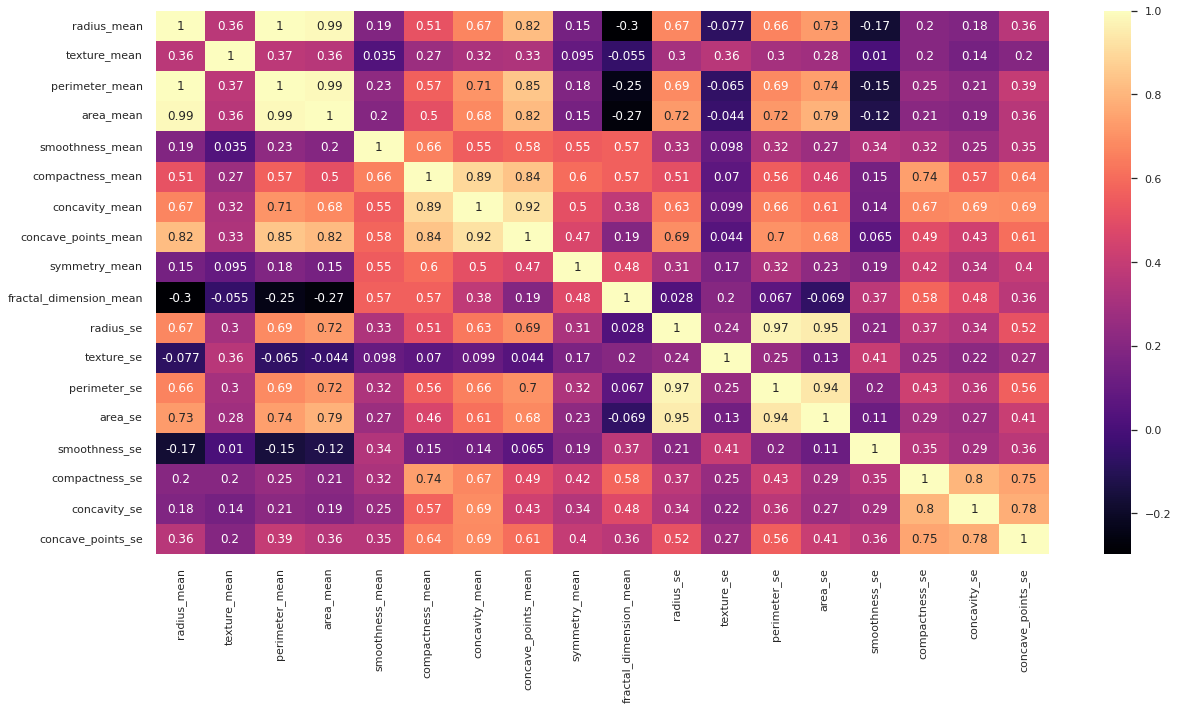

In [18]:
plt.figure(figsize=(20,10))
corr = X.corr() #utilisé pour trouver la corrélation par paires de toutes les colonnes dans Data
sns.heatmap(corr, annot=True, cmap="magma")

Now, we got our confusion matrix.

In order to compute the main performance measure, we need to extract from that matrix the FP,FN, TP and TN.

<center><img src="https://i.stack.imgur.com/AuTKP.png"></center>


### ⚫ Accuracy

How many values did we predict correctly? How many true predictions out of all samples there are?

<center><img src="https://www.nbshare.io/static/snapshots/Accuracy_3-min.png"></center>

# 📒 Classification

## Méthode 1 : KNN

Ici il faudra implémenter la méthode, puis la tester et vérifier les métriques en variant le nombre K

In [19]:
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
from prettytable import PrettyTable

x = PrettyTable(["Model", "Train SCORE", "Test SCORE"])
z=str(int(KNN.score(x_train,y_train)*100))+"%"
v=str(int(KNN.score(x_test,y_test)*100))+"%"
x.add_row(["KNN",z,v])
print(x)

+-------+-------------+------------+
| Model | Train SCORE | Test SCORE |
+-------+-------------+------------+
|  KNN  |     96%     |    90%     |
+-------+-------------+------------+


### Confusion Matrices KNN

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        61
           1       0.87      0.87      0.87        39

    accuracy                           0.90       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100



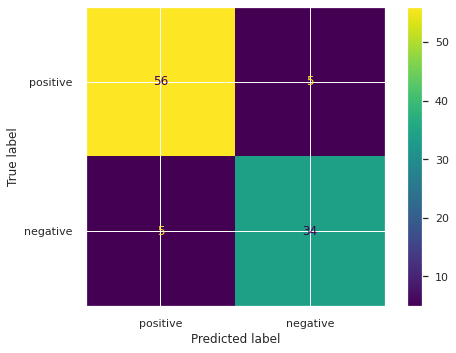

In [21]:
y_pred=KNN.predict(x_test)
print(metrics.classification_report(y_test,y_pred))
display=metrics.ConfusionMatrixDisplay((metrics.confusion_matrix(y_test,y_pred)),display_labels=['positive','negative'])
display.plot()

### Cross-validation: evaluating estimator performance


La mesure de performance rapportée par la validation croisée k -fold est alors la moyenne des valeurs calculées dans la boucle. Cette approche peut être coûteuse en termes de calcul, mais ne gaspille pas trop de données (comme c'est le cas lors de la correction d'un ensemble de validation arbitraire), ce qui constitue un avantage majeur dans des problèmes tels que l'inférence inverse où le nombre d'échantillons est très petit.

<center><img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width=400></center>

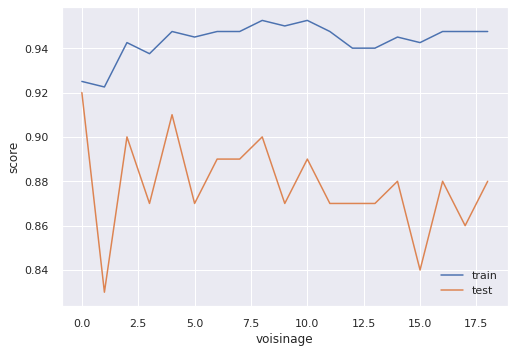

In [22]:
val_scortrain=[]
val_scortest=[]
for k in range(1,20):
    score=cross_val_score(KNeighborsClassifier(k),x_train,y_train,cv=4, scoring='accuracy').mean()
    val_scortrain.append(score)
    score=cross_val_score(KNeighborsClassifier(k),x_test,y_test,cv=4, scoring='accuracy').mean()
    val_scortest.append(score)
plt.plot(val_scortrain,label='train')
plt.plot(val_scortest,label='test')
plt.ylabel('score')
plt.xlabel('voisinage')
plt.legend()

### la courbe  (ROC AUC)
Il s'agit d'une fonction générale, étant donné des points sur une courbe. Pour calculer l'aire sous la courbe ROC

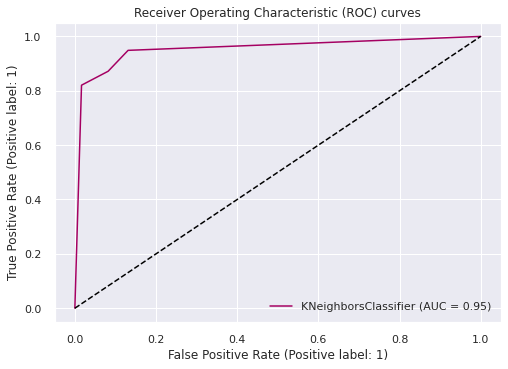

In [23]:
# Make predictions on the test set
y_pred = KNN.predict(x_test)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
if len(y_test_binarized[0])<=1:
    fig,ax_roc = plt.subplots()
    RocCurveDisplay.from_estimator(KNN, x_test, y_test, ax=ax_roc ,c='#A50062')
    plt.plot([0,1],[0,1],'--',c='black')
    ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
    #ax_roc.grid(linestyle="--",c='black')
    plt.legend()
    plt.show()
elif (len(y_test_binarized[0])>1):
    C=["#4B2991","#952EA0","#D44292","#F66D7A","#F6A97A"]
    Classses=np.unique(y_test)
    pred_prob=SVM.predict_proba(X_test)
    fpr = {}
    tpr = {}
    thresh ={}
    roc_auc = dict()
    n_classe = len(Classses)
    for i in range (n_classe):
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
        roc_auc[i] = auc (fpr[i], tpr[i])
    # traçage
        plt.plot(fpr[i], tpr[i],label='%s vs Rest (AUC=%0.2f)'%(Classses[i], roc_auc[i]),c=C[i]) 
    plt.plot([0,1], [0,1],linestyle='--', c='black')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.title('Receiver Operting Characteristic(ROC) courves')
    plt.xlabel('False Rate')
    plt.ylabel('True Rate')
    plt.legend()
    plt.show()

## Méthode 2:Naive Bayes

In [24]:
Naive=GaussianNB()
Naive.fit(x_train,y_train)

GaussianNB()

In [25]:
from prettytable import PrettyTable

x = PrettyTable(["Model", "Train SCORE", "Test SCORE"])
z=str(int(Naive.score(x_train,y_train)*100))+"%"
v=str(int(Naive.score(x_test,y_test)*100))+"%"
x.add_row(["Naive Bayes",z,v])
print(x)

+-------------+-------------+------------+
|    Model    | Train SCORE | Test SCORE |
+-------------+-------------+------------+
| Naive Bayes |     91%     |    88%     |
+-------------+-------------+------------+


### Confusion Matrices Naive Bayes

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        61
           1       0.86      0.82      0.84        39

    accuracy                           0.88       100
   macro avg       0.88      0.87      0.87       100
weighted avg       0.88      0.88      0.88       100



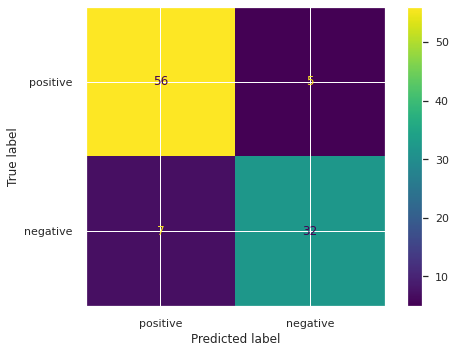

In [26]:
y_pred=Naive.predict(x_test)
print(metrics.classification_report(y_test,y_pred))
display=metrics.ConfusionMatrixDisplay((metrics.confusion_matrix(y_test,y_pred)),display_labels=['positive','negative'])
display.plot()

### Cross-validation: evaluating estimator performance

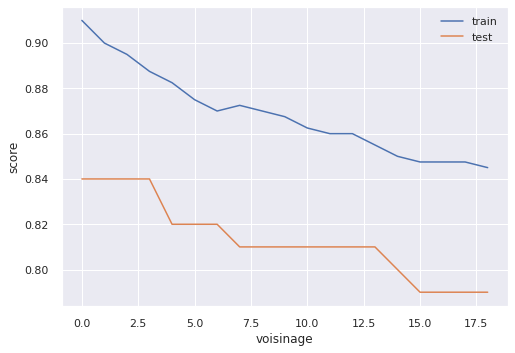

In [27]:
val_scortrain=[]
val_scortest=[]
for k in range(1,20):
    m=float(k/4)
    score=cross_val_score(GaussianNB(var_smoothing=m),x_train,y_train,cv=5, scoring='accuracy').mean()
    val_scortrain.append(score)
    score=cross_val_score(GaussianNB(var_smoothing=m),x_test,y_test,cv=5, scoring='accuracy').mean()
    val_scortest.append(score)
plt.plot(val_scortrain,label='train')
plt.plot(val_scortest,label='test')
plt.ylabel('score')
plt.xlabel('voisinage')
plt.legend()

### la courbe  (ROC AUC)
Il s'agit d'une fonction générale, étant donné des points sur une courbe. Pour calculer l'aire sous la courbe ROC

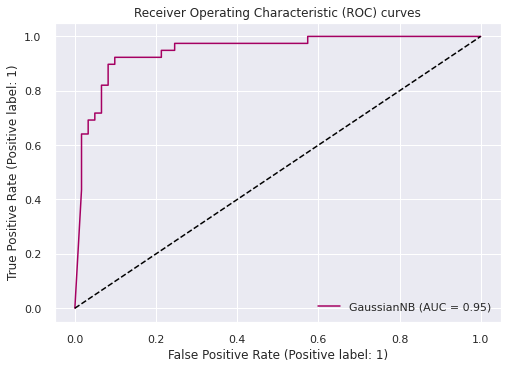

In [28]:
# Make predictions on the test set
y_pred = Naive.predict(x_test)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
if len(y_test_binarized[0])<=1:
    fig,ax_roc = plt.subplots()
    RocCurveDisplay.from_estimator(Naive, x_test, y_test, ax=ax_roc ,c='#A50062')
    plt.plot([0,1],[0,1],'--',c='black')
    ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
    #ax_roc.grid(linestyle="--",c='black')
    plt.legend()
    plt.show()
elif (len(y_test_binarized[0])>1):
    C=["#4B2991","#952EA0","#D44292","#F66D7A","#F6A97A"]
    Classses=np.unique(y_test)
    pred_prob=Naive.predict_proba(X_test)
    fpr = {}
    tpr = {}
    thresh ={}
    roc_auc = dict()
    n_classe = len(Classses)
    for i in range (n_classe):
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
        roc_auc[i] = auc (fpr[i], tpr[i])
    # traçage
        plt.plot(fpr[i], tpr[i],label='%s vs Rest (AUC=%0.2f)'%(Classses[i], roc_auc[i]),c=C[i]) 
    plt.plot([0,1], [0,1],linestyle='--', c='black')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.title('Receiver Operting Characteristic(ROC) courves')
    plt.xlabel('False Rate')
    plt.ylabel('True Rate')
    plt.legend()
    plt.show()

## Méthode 3:DecisionTreeClassifier

In [37]:
#entropy ,gini
AD=DecisionTreeClassifier(criterion = 'entropy',max_depth=10)
AD.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [39]:
from prettytable import PrettyTable

x = PrettyTable(["Model", "Train SCORE", "Test SCORE"])
z=str(int(AD.score(x_train,y_train)*100))+"%"
v=str(int(AD.score(x_test,y_test)*100))+"%"
x.add_row([" DecisionTree",z,v])
print(x)

+---------------+-------------+------------+
|     Model     | Train SCORE | Test SCORE |
+---------------+-------------+------------+
|  DecisionTree |     100%    |    90%     |
+---------------+-------------+------------+


### Confusion Matrices DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        61
           1       0.87      0.87      0.87        39

    accuracy                           0.90       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100



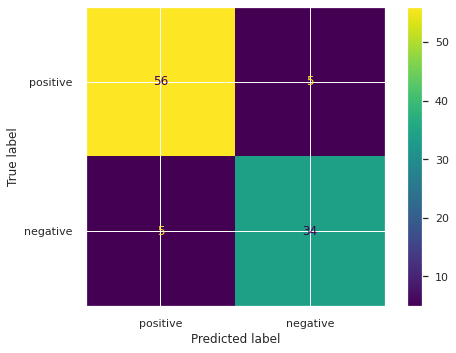

In [40]:
y_pred =AD.predict(x_test)
print(metrics.classification_report(y_test,y_pred))
display=metrics.ConfusionMatrixDisplay((metrics.confusion_matrix(y_test,y_pred)),display_labels=['positive','negative'] )
display.plot()
plt.show()

### Cross-validation: evaluating estimator performance

<function matplotlib.pyplot.show(close=None, block=None)>

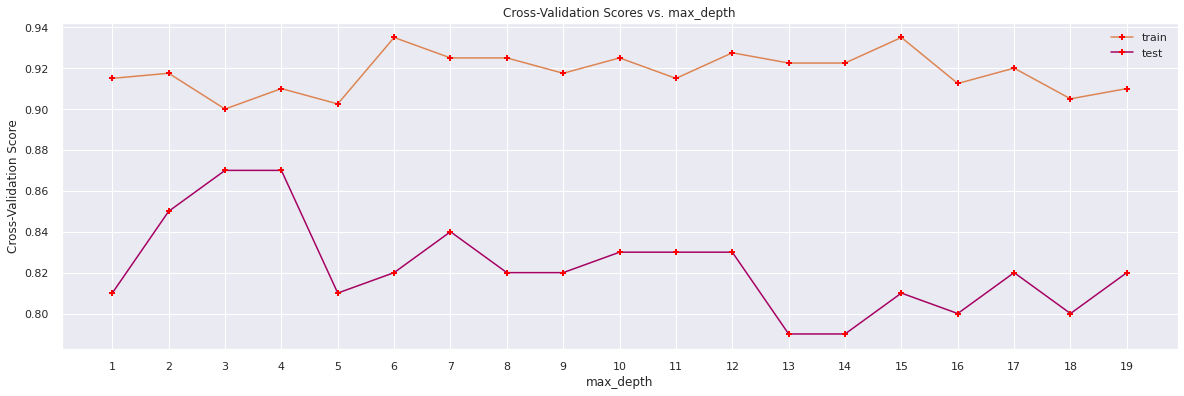

In [45]:
max_depth_values = range(1, 20)
cross_val_scores = []
cross_val_scorestest=[]
for depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion = 'entropy',max_depth=depth)
    scores_train = cross_val_score(clf, x_train, y_train, cv=5) 
    cross_val_scores.append(np.mean(scores_train))
    scores_test = cross_val_score(clf, x_test, y_test, cv=5) 
    cross_val_scorestest.append(np.mean(scores_test))

plt.figure(figsize=(20, 6))
plt.plot(max_depth_values, cross_val_scores, marker='P',c="C1",markerfacecolor='red',label='train')
plt.plot(max_depth_values, cross_val_scorestest, marker='P',c='#A50062',markerfacecolor='red',label='test')

plt.title('Cross-Validation Scores vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Cross-Validation Score')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show

### DecisionTreeClassifier

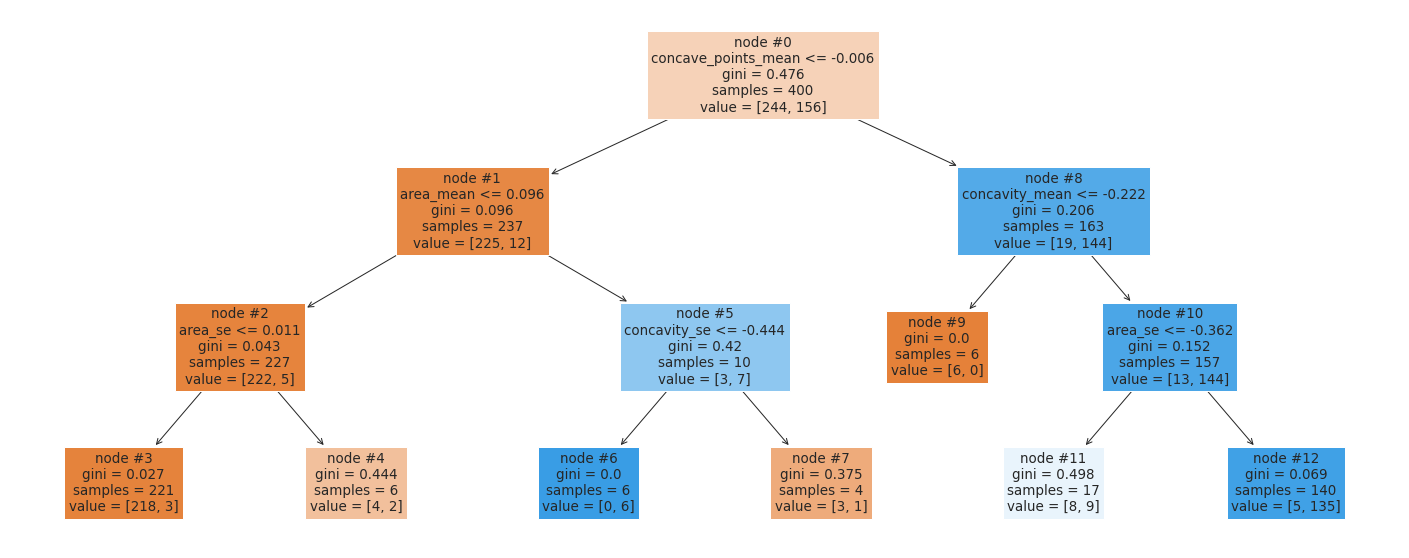

In [43]:
AD=DecisionTreeClassifier(max_depth = 3)
AD.fit(x_train,y_train)
plt.figure(figsize=(25,10))
plot_tree(AD,feature_names = x_test.columns,filled = True,node_ids=True)
plt.show()

### la courbe (ROC AUC)
Il s'agit d'une fonction générale, étant donné des points sur une courbe. Pour calculer l'aire sous la courbe ROC

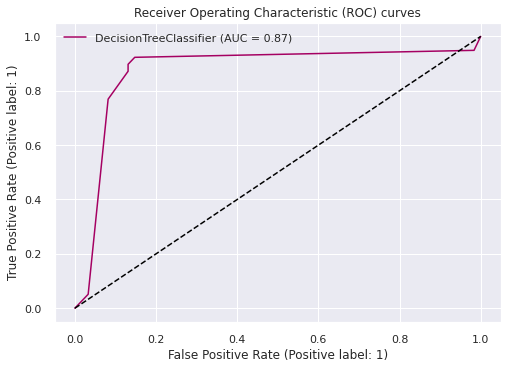

In [46]:
# Make predictions on the test set
y_pred = AD.predict(x_test)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
if len(y_test_binarized[0])<=1:
    fig,ax_roc = plt.subplots()
    RocCurveDisplay.from_estimator(AD, x_test, y_test, ax=ax_roc ,c='#A50062')
    plt.plot([0,1],[0,1],'--',c='black')
    ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
    #ax_roc.grid(linestyle="--",c='black')
    plt.legend()
    plt.show()
elif (len(y_test_binarized[0])>1):
    C=["#4B2991","#952EA0","#D44292","#F66D7A","#F6A97A"]
    Classses=np.unique(y_test)
    pred_prob=AD.predict_proba(X_test)
    fpr = {}
    tpr = {}
    thresh ={}
    roc_auc = dict()
    n_classe = len(Classses)
    for i in range (n_classe):
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
        roc_auc[i] = auc (fpr[i], tpr[i])
    # traçage
        plt.plot(fpr[i], tpr[i],label='%s vs Rest (AUC=%0.2f)'%(Classses[i], roc_auc[i]),c=C[i]) 
    plt.plot([0,1], [0,1],linestyle='--', c='black')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.title('Receiver Operting Characteristic(ROC) courves')
    plt.xlabel('False Rate')
    plt.ylabel('True Rate')
    plt.legend()
    plt.show()

## Méthode 4:Reseau Neurones 

In [47]:
# Create an instance of MLPClassifier
mlf = MLPClassifier(hidden_layer_sizes=(45), max_iter=1000)
# Train the model
mlf.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=45, max_iter=1000)

In [48]:
from prettytable import PrettyTable

x = PrettyTable(["Model", "Train SCORE", "Test SCORE"])
z=str(int(mlf.score(x_train,y_train)*100))+"%"
v=str(int(mlf.score(x_test,y_test)*100))+"%"
x.add_row([" Reseau Neurones",z,v])
print(x)

+------------------+-------------+------------+
|      Model       | Train SCORE | Test SCORE |
+------------------+-------------+------------+
|  Reseau Neurones |     99%     |    92%     |
+------------------+-------------+------------+


### Confusion Matrices Reseau Neurones

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        61
           1       0.88      0.92      0.90        39

    accuracy                           0.92       100
   macro avg       0.91      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



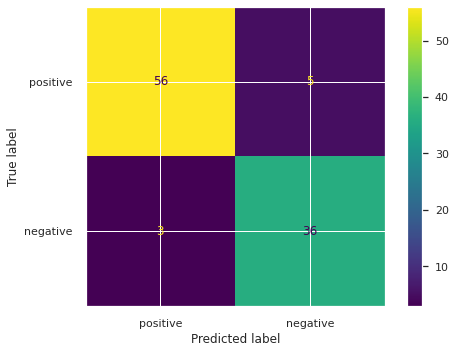

In [49]:
y_pred =mlf.predict(x_test)
print(metrics.classification_report(y_test,y_pred))
display=metrics.ConfusionMatrixDisplay((metrics.confusion_matrix(y_test,y_pred)),display_labels=['positive','negative'] )
display.plot()
plt.show()


### Cross-validation: evaluating estimator performance

<function matplotlib.pyplot.show(close=None, block=None)>

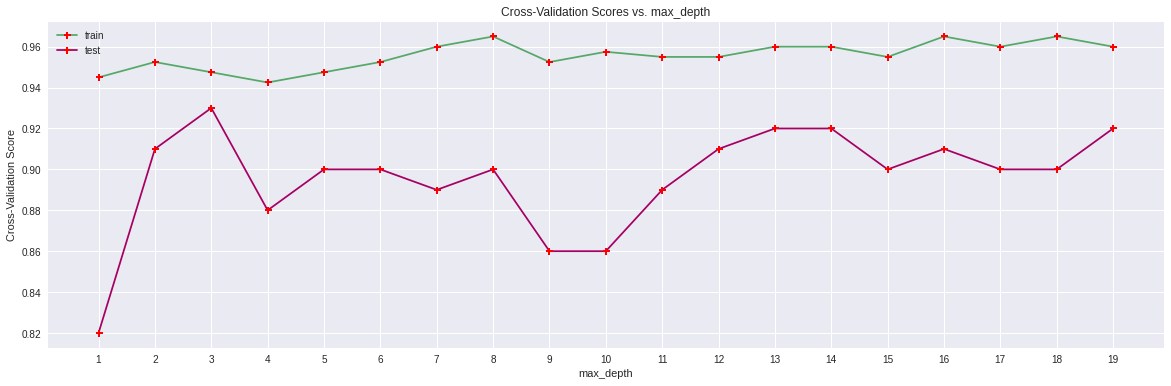

In [59]:
max_depth_values = range(1, 20)
cross_val_scores = []
cross_val_scorestest=[]
for depth in max_depth_values:
    clf = mlf = MLPClassifier(hidden_layer_sizes=(depth), max_iter=1000)
    scores_train = cross_val_score(clf, x_train, y_train, cv=5) 
    cross_val_scores.append(np.mean(scores_train))
    scores_test = cross_val_score(clf, x_test, y_test, cv=5) 
    cross_val_scorestest.append(np.mean(scores_test))

plt.figure(figsize=(20, 6))
plt.plot(max_depth_values, cross_val_scores, marker='P',c="C1",markerfacecolor='red',label='train')
plt.plot(max_depth_values, cross_val_scorestest, marker='P',c='#A50062',markerfacecolor='red',label='test')

plt.title('Cross-Validation Scores vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Cross-Validation Score')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show

### la courbe (ROC AUC)
Il s'agit d'une fonction générale, étant donné des points sur une courbe. Pour calculer l'aire sous la courbe ROC

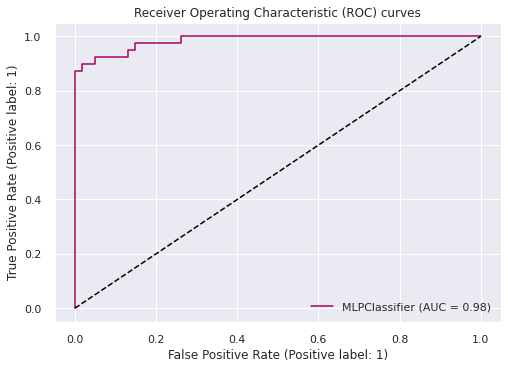

In [50]:
# Make predictions on the test set
y_pred = mlf.predict(x_test)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
if len(y_test_binarized[0])<=1:
    fig,ax_roc = plt.subplots()
    RocCurveDisplay.from_estimator(mlf, x_test, y_test, ax=ax_roc ,c='#A50062')
    plt.plot([0,1],[0,1],'--',c='black')
    ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
    #ax_roc.grid(linestyle="--",c='black')
    plt.legend()
    plt.show()
elif (len(y_test_binarized[0])>1):
    C=["#4B2991","#952EA0","#D44292","#F66D7A","#F6A97A"]
    Classses=np.unique(y_test)
    pred_prob=mlf.predict_proba(X_test)
    fpr = {}
    tpr = {}
    thresh ={}
    roc_auc = dict()
    n_classe = len(Classses)
    for i in range (n_classe):
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
        roc_auc[i] = auc (fpr[i], tpr[i])
    # traçage
        plt.plot(fpr[i], tpr[i],label='%s vs Rest (AUC=%0.2f)'%(Classses[i], roc_auc[i]),c=C[i]) 
    plt.plot([0,1], [0,1],linestyle='--', c='black')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.title('Receiver Operting Characteristic(ROC) courves')
    plt.xlabel('False Rate')
    plt.ylabel('True Rate')
    plt.legend()
    plt.show()

## Méthode 5:SVM

In [51]:
# Create an instance of MLPClassifier

svm = svm.SVC(kernel='rbf',C=0.1)
# Train the model
svm.fit(x_train, y_train)

SVC(C=0.1)

In [52]:
from prettytable import PrettyTable

x = PrettyTable(["Model", "Train SCORE", "Test SCORE"])
z=str(int(svm.score(x_train,y_train)*100))+"%"
v=str(int(svm.score(x_test,y_test)*100))+"%"
x.add_row([" SVM",z,v])
print(x)

+-------+-------------+------------+
| Model | Train SCORE | Test SCORE |
+-------+-------------+------------+
|   SVM |     94%     |    90%     |
+-------+-------------+------------+


### Confusion Matrices SVM

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        61
           1       0.91      0.82      0.86        39

    accuracy                           0.90       100
   macro avg       0.90      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100



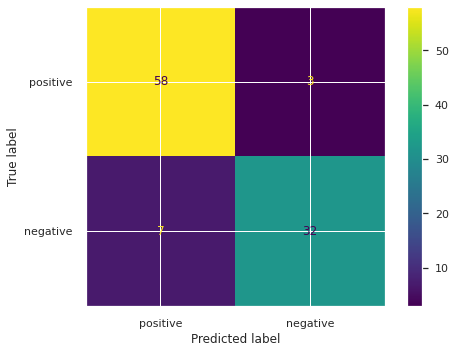

In [53]:
y_pred =svm.predict(x_test)
print(metrics.classification_report(y_test,y_pred))
display=metrics.ConfusionMatrixDisplay((metrics.confusion_matrix(y_test,y_pred)),display_labels=['positive','negative'] )
display.plot()
plt.show()

### Cross-validation: evaluating estimator performance

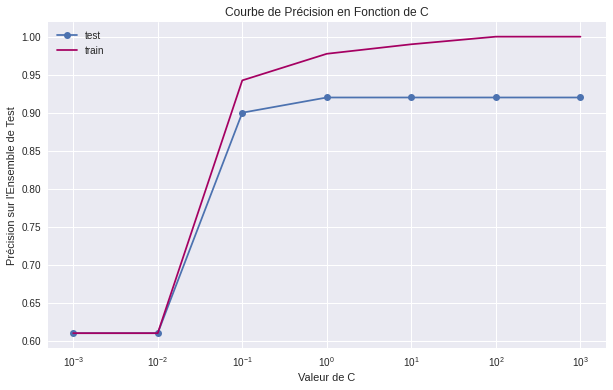

Meilleur paramètre C : 1.0


In [56]:
 #Définir les valeurs de C que vous souhaitez tester
from sklearn.metrics import accuracy_score
C_values = np.logspace(-3, 3, 7)

# Entraîner le modèle pour différentes valeurs de C et enregistrer les précisions
accuracies = []
train=[]
for C in C_values:
    # Créer un classificateur SVM avec noyau linéaire et la valeur actuelle de C
    svm_model = svm.SVC(kernel='rbf', C=C)
    
    # Entraîner le modèle sur l'ensemble d'entraînement
    svm_model.fit(x_train, y_train)
    
    # Faire des prédictions sur l'ensemble de test
    y_pred = svm_model.predict(x_test)
    y_predt = svm_model.predict(x_train)
    
    # Calculer la précision et l'enregistrer
    accuracy = accuracy_score(y_test, y_pred)
    accuracyt = accuracy_score(y_train, y_predt)
    accuracies.append(accuracy)
    train.append(accuracyt)

# Tracer la courbe de précision en fonction de C
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, accuracies, marker='o',label='test')
plt.semilogx(C_values, train, c='#A50062',label='train',marker='+')
plt.title('Courbe de Précision en Fonction de C')
plt.xlabel('Valeur de C')
plt.ylabel('Précision sur l\'Ensemble de Test')
plt.grid(True)
plt.legend()
plt.show()

# Trouver la meilleure valeur de C
best_C = C_values[np.argmax(accuracies)]
print(f"Meilleur paramètre C : {best_C}")


### la courbe (ROC AUC)

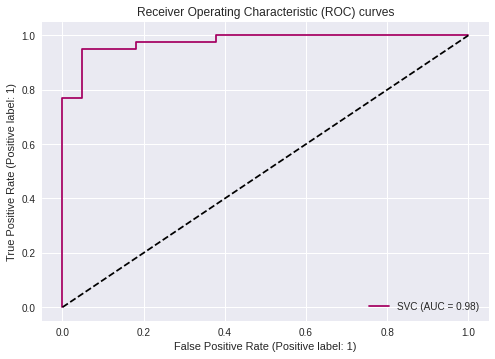

In [57]:
SVM = svm.SVC(probability=True)
SVM.fit(x_train, y_train)

# Make predictions on the test set
y_pred = SVM.predict(x_test)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
if len(y_test_binarized[0])<=1:
    fig,ax_roc = plt.subplots()
    RocCurveDisplay.from_estimator(SVM, x_test, y_test, ax=ax_roc ,c='#A50062')
    plt.plot([0,1],[0,1],'--',c='black')
    ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
    #ax_roc.grid(linestyle="--",c='black')
    plt.legend()
    plt.show()
elif (len(y_test_binarized[0])>1):
    C=["#4B2991","#952EA0","#D44292","#F66D7A","#F6A97A"]
    Classses=np.unique(y_test)
    pred_prob=SVM.predict_proba(x_test)
    fpr = {}
    tpr = {}
    thresh ={}
    roc_auc = dict()
    n_classe = len(Classses)
    for i in range (n_classe):
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
        roc_auc[i] = auc (fpr[i], tpr[i])
    # traçage
        plt.plot(fpr[i], tpr[i],label='%s vs Rest (AUC=%0.2f)'%(Classses[i], roc_auc[i]),c=C[i]) 
    plt.plot([0,1], [0,1],linestyle='--', c='black')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.title('Receiver Operting Characteristic(ROC) courves')
    plt.xlabel('False Rate')
    plt.ylabel('True Rate')
    plt.legend()
    plt.show()

### Comparison des 3 kernel de SVM

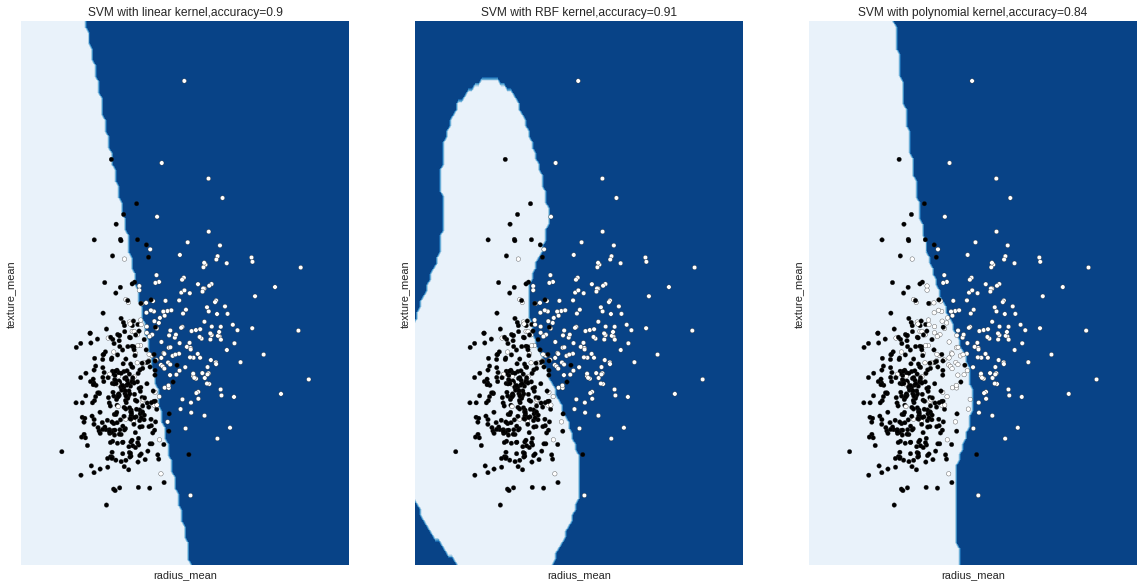

In [58]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

XX = X.iloc[:, 0:2]
YY = Y

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(XX, YY) for clf in models)

# title for the plots
titles = (
    "SVM with linear kernel",
    "SVM with RBF kernel",
    "SVM with polynomial kernel",
)


# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 3,figsize=(20, 10)) 


#plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = XX.iloc[:, 0], XX.iloc[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        XX,
        response_method="predict",
        cmap=plt.cm.Blues,
        alpha=1,
        ax=ax,
        
    )
    m=round(clf.score(XX,YY),2)
    ax.scatter(X0, X1, c=YY, s=20,cmap=plt.cm.gist_gray, edgecolors="k")

    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(f"{title},accuracy={m}")

plt.show()